# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]
#Adj Close is adjusted close price adjusted for both dividends and splits before the next days open.

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [4]:
df
# Difference in stockprice to the next period.
df.diff()
#We see than we have one columnd down. We can try to move that 1 to make our new column dataframe differeneces. 
df["Diff"]= df["Adj Close"].diff().shift(-1)    # We see that we have one column up.
#This is like the expected return.
df["Target"] = np.sign(df["Diff"])
df["Premium"] = 0.08*df["Adj Close"]

In [33]:
df.head()
#FP we losse 100%. If TP we win the premium. If FN we loose the premium. If TN we win 100%.

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [36]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [37]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [39]:
#Now we build a logistic regression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [40]:
df["Prediction"] = y_pred


# 4.) Add columns, prediction and profits.

In [53]:
df["Profits"] = 0
#TP
#When the prediction states that the diff will be above the strike, we get the premium that is 0.08*Adj Close.
df.loc[(df["Prediction"]==1) & (df["Target"]==1), "Profits"] = df.loc[(df["Prediction"]==1) & (df["Target"]==1), "Premium"]
#FP
#Here we predict that the diff will be above the strike, but it is not. We loose the diff but still gain the premium.
df.loc[(df["Prediction"]==1) & (df["Target"]==-1), "Profits"] = 100*df["Diff"] + df["Premium"]
#Others are 0

C:\Users\luisj\AppData\Local\Temp\ipykernel_19764\2090117993.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[6.77095652e-03 7.84186482e-03 4.21455175e-03 5.14728785e-03
 3.52368057e-03 3.73094171e-03 4.97456878e-03 5.04365921e-03
 7.01275706e-03 8.25644732e-03 1.12964547e-02 1.16764355e-02
 1.39564228e-02 9.63824749e-03 5.63095868e-03 6.73641026e-03
 6.84004009e-03 6.84004009e-03 7.04730272e-03 6.84004009e-03
 4.80185181e-03 4.14546371e-03 4.35278773e-03 5.14728785e-03
 5.56187093e-03 6.08002007e-03 6.39097512e-03 6.90912664e-03
 7.80731857e-03 8.36007774e-03 8.63642454e-03 9.25827026e-03
 9.56915915e-03 1.10545957e-02 1.11928272e-02 1.53382921e-02
 1.78255415e-02 2.18661284e-02 2.24196649e-02 2.28348732e-02
 2.99315476e-02 1.83314049e-02 2.30531263e-02 2.22636962e-02
 2.28202581e-02 2.31442952e-02 2.22799635e-02 2.10782766e-02
 2.00128245e-02 2.19087791e-02 2.23790455e-02 2.51126790e-02
 1.92344844e-02 1.9296

In [54]:
df

,Adj Close,Diff,Target,Premium,Prediction,Profits
Date,,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0,0.000000
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0,0.000000
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0,0.000000
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0,0.007842
...,...,...,...,...,...,...
2023-05-31,176.778076,16.675476,1.0,14.142246,1.0,14.142246
2023-06-30,193.453552,2.473404,1.0,15.476284,1.0,15.476284
2023-07-31,195.926956,-8.304138,-1.0,15.674156,-1.0,0.000000


# 5.) Plot profits over time

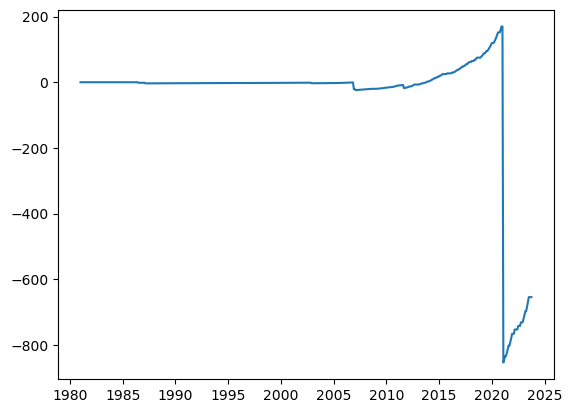

In [55]:
plt.plot(np.cumsum(df["Profits"]))

#5.5)  I am confident that my skills would bring significant value to PJ and/or Philip Liu. With a robust background in work experience and a proven ability to collaborate effectively within a team, I am well-equipped to contribute positively. Specifically, I can highlight the following:

-   Team Leadership: Regarding my work experience at the Central Bank of Peru, i have strong capabilities in leading teams, fostering collaboration, and ensuring the successful execution of collective goals.

-   Coding Proficiency: My expertise extends to proficient coding in Python and R, enabling me to tackle complex tasks and contribute to technical aspects of projects.

-   Office Software Skills: I am adept in utilizing essential office software, including Excel, Word, and Power Point, streamlining tasks and enhancing overall productivity.

-   Startup Experience in Peru: Having worked in a startup environment in Peru, I bring valuable insights and adaptability to dynamic and entrepreneurial settings.

I believe that these attributes make me a well-rounded candidate, poised to make meaningful contributions to the team and the objectives at hand.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.